Name: Ashwin Kharat

Rollno: 241310004

In [ ]:
#-- This will reset the runtime and clear all variable.
%reset -f
#A new Begining

#-- importing all the necessary Librariesimport re
import sys
import os
import subprocess

# List of image files to ignore in the extracted figures
ignore_images = ["iitk_red"]

def extract_figures_without_tikz(tex_file):
    # Read the content of the original .tex file
    with open(tex_file, 'r') as file:
        content = file.read()
    
    # Find the preamble and postamble by locating \begin{document} and \end{document}
    preamble = re.search(r'(.+?\\begin{document})', content, re.DOTALL)
    postamble = re.search(r'(\\end{document}.*)', content, re.DOTALL)

    # Extract everything between \begin{document} and \end{document}
    main_content = re.search(r'\\begin{document}(.*?)\\end{document}', content, re.DOTALL).group(1)

    # Find all figure environments within the main content
    figures = re.findall(r'(\\begin{figure}.*?\\end{figure})', main_content, re.DOTALL)

    # Process each figure to remove any tikzpicture environment if present and ignore specific images
    processed_figures = []
    for figure in figures:
        # Check if figure contains any ignored images
        if any(ignored_image in figure for ignored_image in ignore_images):
            continue  # Skip this figure

        # Remove any tikzpicture environment within the figure
        figure_no_tikz = re.sub(r'\\begin{tikzpicture}.*?\\end{tikzpicture}', '', figure, flags=re.DOTALL)
        processed_figures.append(figure_no_tikz)

    # Construct the new content with only the figures
    new_content = preamble.group(0) + "\n\n"  # Full preamble up to \begin{document}
    #new_content += "\\begin{document}\n\n"

    # Manually add the specified image
    new_content += "\\includegraphics[width=0.4\\textwidth]{iitk_red}\n\n"

    # Add each processed figure to the document
    for figure in processed_figures:
        new_content += figure + "\n\n"

    new_content += postamble.group(0)  # Full postamble after \end{document}

    # Define output file name and save it in the same directory as input file
    output_file = os.path.join(os.path.dirname(tex_file), "images_only.tex")
    with open(output_file, 'w') as file:
        file.write(new_content)

    print(f"Extracted figures without TikZ written to {output_file}")
    return output_file

def compile_to_pdf(tex_file):
    """Compile the .tex file to PDF in the same directory as the .tex file."""
    tex_dir = os.path.dirname(tex_file)
    tex_filename = os.path.basename(tex_file)

    # Change to the directory of the .tex file and run pdflatex
    subprocess.run(["pdflatex", tex_filename], cwd=tex_dir)

def cleanup_temp_files(tex_file):
    """Remove temporary files generated by pdflatex."""
    tex_dir = os.path.dirname(tex_file)
    base_name = os.path.splitext(os.path.basename(tex_file))[0]
    
    # Define common temp file extensions generated by pdflatex
    temp_extensions = [".aux", ".log", ".out", ".toc"]
    temp_files = [os.path.join(tex_dir, base_name + ext) for ext in temp_extensions]
    
    # Remove each temporary file if it exists
    for temp_file in temp_files:
        if os.path.exists(temp_file):
            os.remove(temp_file)
    
    print("Temporary files removed.")

if __name__ == "__main__":
    # Get the input .tex file from command line arguments
    if len(sys.argv) != 2:
        print("Usage: python extract_images_only.py <path_to_tex_file>")
        sys.exit(1)

    tex_file = sys.argv[1]

    # Run the extraction and compilation
    output_tex = extract_figures_without_tikz(tex_file)
    compile_to_pdf(output_tex)

    # Remove temporary files after PDF generation
    cleanup_temp_files(output_tex)

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
import ipywidgets as widgets
from IPython.display import display, HTML
from scipy.integrate import solve_ivp


In [2]:
C = 1

def rhs(r,v,theta,omega):
    drdt = v
    dvdt = r*omega**2-C/(r**2)
    
    dthetadt = omega
    domegadt = -2*v*omega/r
    return [drdt,dvdt,dthetadt,domegadt]

def E(r,v,theta,omega):
    return 0.5*v**2 + 0.5*r**2*omega**2 - C/r

def l(r,v,theta,omega):
    return r**2*omega

def eccentricity(E,l,C):
    return np.sqrt(1+2*E*l**2/C**2)



def EulerCromerODE(initCondn, tRange, rhs):
    dt = tRange[2]
    time = np.arange(tRange[0], tRange[1] + dt , dt)
    theta = np.zeros(len(time))
    omega = np.zeros(len(time))
    r = np.zeros(len(time))
    v = np.zeros(len(time))

    theta[0] = initCondn[2]
    omega[0] = initCondn[3]
    r[0] = initCondn[0]
    v[0] = initCondn[1]


    for i in range(0, len(time)-1):
        rhs_i = rhs( r[i],v[i],theta[i],omega[i])

        v[i+1] = v[i] - rhs_i[1] * dt
        omega[i+1] = omega[i] - rhs_i[3] * dt

        rhs_ip = rhs( r[i+1],v[i+1],theta[i+1],omega[i+1])

        r[i+1] = r[i] - rhs_ip[0] * dt
        theta[i+1] = theta[i] - rhs_ip[2]* dt

    return r,v,theta,omega,time

def EulerCromerODE_2(initCondn, tRange, rhs):
    dt = tRange[2]
    time = np.arange(tRange[0], tRange[1] + dt , dt)
    theta = np.zeros(len(time))
    omega = np.zeros(len(time))
    r = np.zeros(len(time))
    v = np.zeros(len(time))

    theta[0] = initCondn[2]
    omega[0] = initCondn[3]
    r[0] = initCondn[0]
    v[0] = initCondn[1]

    for i in range(0, len(time)-1):
        rhs_i = rhs( r[i],v[i],theta[i],omega[i])
        r[i+1] = r[i] + rhs_i[0] * dt
        v[i+1] = v[i] + rhs_i[1] * dt
        theta[i+1] = theta[i] + rhs_i[2] * dt
        omega[i+1] = omega[i] + rhs_i[3] * dt
    return r,v,theta,omega,time


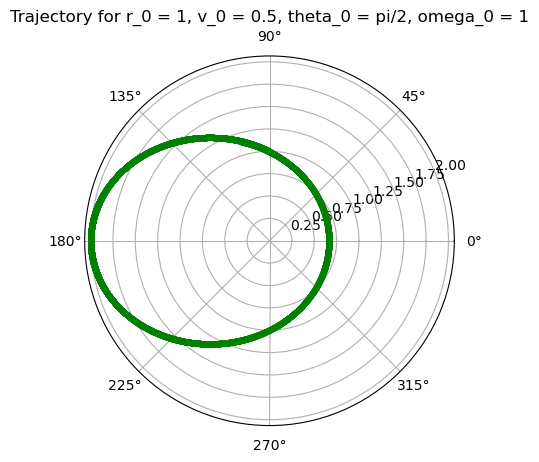

In [3]:
time_0 = 0
time_max = 10
time_step = 1/1000 # 10th part of a second 

r_0 = 1
v_0 = 0.5
theta_0 = np.pi/2
omega_0 = 1   
   

initCondn = [r_0,v_0,theta_0, omega_0]
tRange = [time_0, time_max, time_step]

dt = tRange[2]
time = np.arange(tRange[0], tRange[1] + dt , dt)

r,v,theta,omega,time = EulerCromerODE_2(initCondn, tRange, rhs)

plt.figure()
plt.polar(theta, r, 'g.') 
plt.title(f"Trajectory for r_0 = {r_0}, v_0 = {v_0}, theta_0 = pi/2, omega_0 = {omega_0}")
plt.show()

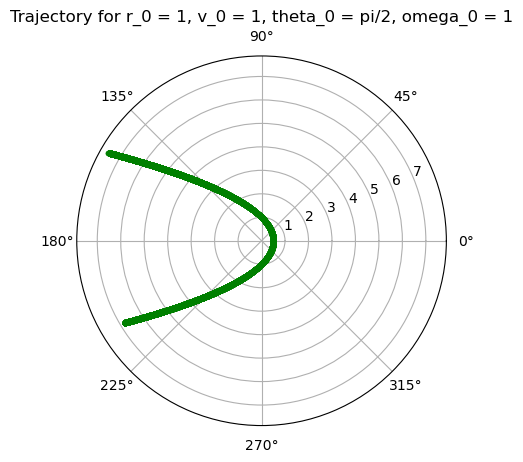

In [4]:
time_0 = 0
time_max = 10
time_step = 1/1000 # 10th part of a second 

r_0 = 1
v_0 = 1
theta_0 = np.pi/2
omega_0 = 1   
   

initCondn = [r_0,v_0,theta_0, omega_0]
tRange = [time_0, time_max, time_step]

dt = tRange[2]
time = np.arange(tRange[0], tRange[1] + dt , dt)

r,v,theta,omega,time = EulerCromerODE_2(initCondn, tRange, rhs)

# plt.figure()
# plt.polar(theta, r, 'g.')
# plt.title(f"Trajectory for r_0 = {r_0}, v_0 = {v_0}, theta_0 = pi/2, omega_0 = {omega_0}")
# plt.show()

time_0 = 0  # Start time
time_max = -10  # End time
time_step = -1/1000  # Negative time step to go backward
tRange = [time_0, time_max, time_step]

plt.figure()
plt.polar(theta, r, 'g.')
r,v,theta,omega,time = EulerCromerODE_2(initCondn, tRange, rhs)
plt.polar(theta, r, 'g.')
plt.title(f"Trajectory for r_0 = {r_0}, v_0 = {v_0}, theta_0 = pi/2, omega_0 = {omega_0}")
plt.show()


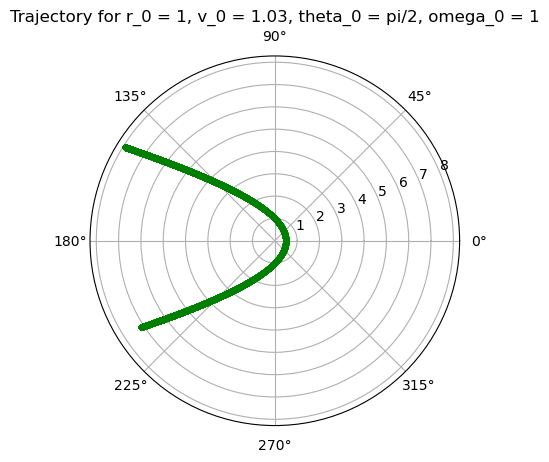

In [5]:
time_0 = 0
time_max = 10
time_step = 1/1000 # 10th part of a second 

r_0 = 1
v_0 = 1.03
theta_0 = np.pi/2
omega_0 = 1   
   

initCondn = [r_0,v_0,theta_0, omega_0]
tRange = [time_0, time_max, time_step]

dt = tRange[2]
time = np.arange(tRange[0], tRange[1] + dt , dt)

r,v,theta,omega,time = EulerCromerODE_2(initCondn, tRange, rhs)



# plt.figure()
# plt.polar(theta, r, 'g.')
# plt.title("r vs v ")
# plt.show()

time_0 = 0  # Start time
time_max = -10  # End time
time_step = -1/1000  # Negative time step to go backward
tRange = [time_0, time_max, time_step]

plt.figure()
plt.polar(theta, r, 'g.')
r,v,theta,omega,time = EulerCromerODE_2(initCondn, tRange, rhs)
plt.polar(theta, r, 'g.')
plt.title(f"Trajectory for r_0 = {r_0}, v_0 = {v_0}, theta_0 = pi/2, omega_0 = {omega_0}")
plt.show()


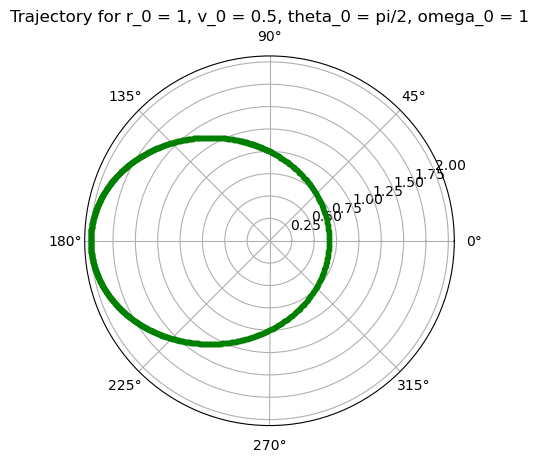

In [6]:
#Other method is to Solving the ODE using scipy's solve_ivp

C=1

def rhs(t, y):
    r, v, theta, omega= y
    drdt = v
    dvdt = r * omega**2 - C / r**2
    dthetadt = omega
    domegadt = -2 * v * omega / r
    return [drdt, dvdt, dthetadt, domegadt]


r_0, v_0, theta_0, omega_0, C   = 1, 0.5, np.pi/2, 1, 1

initCondn = [r_0, v_0, theta_0, omega_0 ] 
t_range = (0, 10) 
time = np.linspace(0, 10, 1000)   

solution = solve_ivp(rhs, t_range, initCondn, t_eval=time, method='DOP853')

r, v, theta, omega = solution.y


plt.polar(theta, r,"g.")
plt.title(f"Trajectory for r_0 = {r_0}, v_0 = {v_0}, theta_0 = pi/2, omega_0 = {omega_0}")
plt.show()


# Q9 C

In [7]:
G = 6.67*10**-11 #N m2 /kg 2
me = 6*10**24 #kg Mass of the Earth = 
msun = 2 *10**30#  Mass of the Sun =  kg
Rs = 1.5 * 10**11 #m  = 1A.U. =
ts = 3.15 * 10**7 #s = 1year 

In [8]:
r_0 = 0.98 * Rs
v_0 = 30.28 * 1000 # 30.28 km/s to meters/s
theta_0 = np.pi/2
v_radial_o = 0

omega_0 = v_0/r_0 # v = r omega

In [9]:
def C_tilda(G,me,msun,mu,ts,Rs):
    return (G*me*msun*ts**2)/(mu*Rs**3)

mu = (me*msun)/(me+msun)

print("C tilda = ",C_tilda(G,me,msun,mu,ts,Rs))

C tilda =  39.2197176588


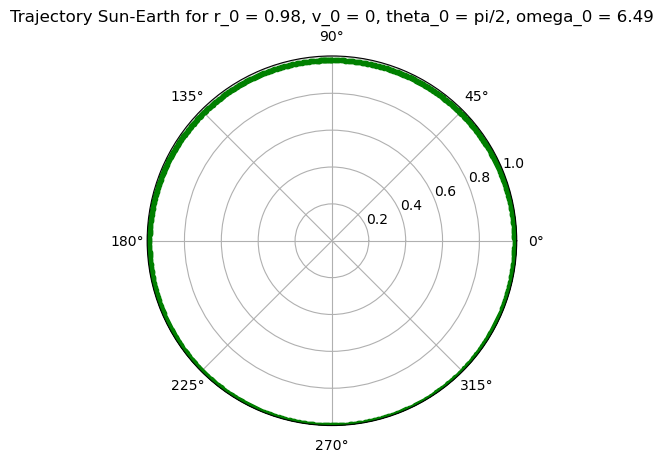

In [10]:

r_0, v_0, theta_0, omega_0, C   = 0.98, 0, np.pi/2, 6.49 , C_tilda(G,me,msun,mu,ts,Rs)
def rhs(t, y):
    r, v, theta, omega= y
    drdt = v
    dvdt = r * omega**2 - C / r**2
    dthetadt = omega
    domegadt = -2 * v * omega / r
    return [drdt, dvdt, dthetadt, domegadt]


initCondn = [r_0, v_0, theta_0, omega_0 ] 
t_range = (0, 1) 
time = np.linspace(0, 1, 1000)   

solution = solve_ivp(rhs, t_range, initCondn, t_eval=time, method='DOP853')

r, v, theta, omega = solution.y

plt.polar(theta, r,"g.")
plt.title(f"Trajectory Sun-Earth for r_0 = {r_0}, v_0 = {v_0}, theta_0 = pi/2, omega_0 = {omega_0}")
plt.show()


In [11]:
print(" Eccentricity is = e = ",np.mean(eccentricity( E(r,v,theta,omega), l(r,v,theta,omega),C_tilda(G,me,msun,me,ts,Rs))))


 Eccentricity is = e =  0.01051436038597608
